In [1]:
from tardis.workflows.standard_simulation_solver import StandardSimulationSolver
from tardis.workflows.v_inner_simulation_solver import InnerVelocitySimulationSolver
from tardis.io.configuration.config_reader import Configuration

import numpy as np
from functools import reduce
from astropy import units as u
import numpy.ma as ma

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
config = Configuration.from_yaml('../tardis_example.yml')


In [3]:
solver = InnerVelocitySimulationSolver(config)

Number of density points larger than number of shells. Assuming inner point irrelevant


In [4]:
solver.solve()

/home/jobrien/Documents/soft/tardis/tardis/transport/montecarlo/montecarlo_main_loop.py:142: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  vpacket_collection = vpacket_collections[i]


Emitted Luminosity: 1.641184580261326e+42 erg / s
1058871589.2676698 cm / s
{'t_radiative': <Quantity [12625.037612  , 12860.53394613, 12980.79070524, 13215.76366688,
           13363.89878945, 13657.14421301, 13763.63823313, 13804.67011851,
           13958.82452403, 14072.71071308, 14170.37621888, 14284.27251711,
           14254.01748483, 14271.4519333 , 14326.51256447, 14413.81498266,
           14436.60593629, 14298.86614474, 14369.33440387, 14455.37717072,
           14281.61044524, 14315.33110458, 14398.72767221, 14248.36704032,
           14299.58975802, 14131.11483101, 14011.09856031, 14172.95687047,
           14053.30885316, 14104.26525104, 13950.492525  , 14083.66093865,
           13958.00574775, 13835.47644023, 13842.33838291, 13733.92571628,
           13628.17158291, 13524.38615799, 13696.73931507, 13697.48811155,
           13665.86456317, 13544.81069125, 13464.140919  , 13283.55314878,
           13081.62886491, 12956.89458443, 12817.44163039, 12691.15610746,
        

Emitted Luminosity: 3.9993230243460497e+42 erg / s
1120109532.5814638 cm / s
{'t_radiative': <Quantity [26391.09594409, 19482.96798264, 18274.8058313 , 17711.33430033,
           17370.87689911, 17669.16805843, 18152.42695432, 18316.46017687,
           18199.01783202, 18587.40068846, 19122.07909423, 18607.89258248,
           19306.4256318 , 19227.61508902, 19543.44808941, 19533.51762622,
           18912.14619921, 19168.85628054, 18968.84472162, 19142.33782128,
           19714.2873656 , 19842.13200373, 19215.63493037, 18810.72526836,
           18845.68389323, 19142.95702159, 18766.24398537, 18831.304474  ,
           18458.99774723, 19208.99409286, 18489.60830232, 18774.89109136,
           18915.10220234, 19153.15844475, 18210.45863645, 17877.02814888,
           18666.06033747, 18433.07278951, 18490.21346354, 18351.74317525,
           17675.45644826, 17709.91461168, 17535.18826614, 17118.22145165,
           17243.35537725, 17090.62802464, 16491.94054189, 16327.22319999] K>, 'di

Emitted Luminosity: 7.662215388062356e+42 erg / s
1153068478.08872 cm / s
{'t_radiative': <Quantity [37045.0492788 , 25598.40964193, 25002.32631151, 25402.55569765,
           24436.09425767, 24697.88345097, 24635.10575673, 25223.52746372,
           26023.95615222, 26488.64535328, 26475.9190744 , 25761.20278652,
           26069.7077559 , 27104.69529406, 26738.60591158, 26410.82849396,
           26469.84778652, 26053.60224767, 26578.95331327, 26764.74508524,
           25697.21644043, 26302.25193633, 25355.42811422, 26678.90592103,
           27138.40436096, 27905.75753723, 28387.61334537, 28106.55544126,
           28249.39255822, 26585.27530291, 25921.01947507, 25997.07537022,
           25836.67083145, 25121.71253636, 24419.73087676, 23644.64326098,
           22660.67351432, 23130.54221269, 22408.89242404, 22065.04683528,
           22447.38650896, 21815.40709167, 21839.76610601, 21502.74307063,
           21462.83614462] K>, 'dilution_factor': array([0.90724365, 0.07381958, 0.07

Emitted Luminosity: 1.1981699089099243e+43 erg / s
1173418253.7425492 cm / s
{'t_radiative': <Quantity [45035.78064652, 33346.16440197, 33170.27687544, 32925.92414212,
           32941.3468666 , 33849.7730011 , 33844.08808385, 33193.22858182,
           32595.1209922 , 33516.02512535, 34308.87727085, 33376.66882073,
           32404.26983934, 32624.86969189, 32903.23550781, 34455.53284605,
           36311.99464315, 35352.56300689, 35130.58638863, 34785.50949113,
           34183.01602233, 33354.21284777, 32830.22505667, 34375.70888016,
           35569.88555218, 34601.6392613 , 33973.41784869, 32658.76170303,
           32985.03379352, 32485.49360352, 31612.00714302, 31920.99852322,
           32161.54035073, 31735.51121939, 32011.3395415 , 30855.36030669,
           29616.7339522 , 29651.98453961, 29943.54627509, 29153.0104287 ,
           28706.84365557, 29532.72849368, 27421.04128429] K>, 'dilution_factor': array([1.98966995e+00, 2.58553717e-02, 2.36871517e-02, 2.11375850e-02,
    

Emitted Luminosity: 1.2428535829191138e+43 erg / s
1196431858.708347 cm / s
{'t_radiative': <Quantity [40850.75264735, 36337.60095303, 36729.36570602, 37754.28581469,
           39073.32531331, 37722.04458707, 36214.98782786, 38757.92472751,
           41445.38131719, 40865.81752996, 42325.27191301, 41525.67060023,
           38759.13628384, 38343.0292081 , 38415.66000148, 39843.76729019,
           39688.32789176, 38170.48609756, 36492.91168634, 35468.30949715,
           35156.0567181 , 34933.67694933, 33226.64603121, 33860.45472038,
           33805.2466782 , 32640.71149573, 32668.32935693, 33463.60604241,
           31758.71252074, 31525.8254661 , 31755.39125717, 32210.32822712,
           33353.76102027, 33836.3408415 , 34448.08500172, 32677.88314704,
           32419.8729765 , 32567.81621402, 32781.46771831, 31395.36576182,
           30814.70484813] K>, 'dilution_factor': array([2.56431067e+00, 1.72940718e-02, 1.43983696e-02, 1.12725878e-02,
       9.18876991e-03, 9.02043881e-03

Emitted Luminosity: 1.7675275953535577e+43 erg / s
1206574918.7320538 cm / s
{'t_radiative': <Quantity [35852.52829417, 32209.91424134, 33027.11380891, 33270.29698207,
           35131.78250854, 33649.93813703, 34370.79540889, 35317.59402452,
           35102.33764037, 34763.07477761, 34829.42067723, 35177.08339632,
           35431.81667148, 35578.5968682 , 36048.60004135, 36273.28540356,
           36497.47931385, 34182.27055807, 34566.28483711, 35945.116994  ,
           36517.21608759, 36763.20968413, 35498.49082622, 35772.43806213,
           35351.20550468, 34734.75389111, 34769.31868239, 34898.85930636,
           34831.85727627, 33529.39533925, 34050.71944329, 33703.24077123,
           34183.47300606, 31373.17778274, 30958.81600295, 30170.61632193,
           29428.64160207, 29488.58659214, 29608.51856468] K>, 'dilution_factor': array([1.91704857e+00, 2.70894216e-02, 2.14213732e-02, 1.75692851e-02,
       1.23312487e-02, 1.36262325e-02, 1.10561887e-02, 8.94392579e-03,
       7

Emitted Luminosity: 1.8046256314824188e+43 erg / s
1204162841.6031816 cm / s
{'t_radiative': <Quantity [28478.80526791, 27429.00355541, 28558.19261339, 29982.46380925,
           29735.68636546, 30198.76355681, 30398.57566045, 29884.3581917 ,
           29845.40901265, 30378.55105845, 29724.27683679, 30243.38659423,
           30431.60458186, 30309.35837722, 30678.96179402, 30182.24133233,
           30213.5378942 , 29703.17258245, 29270.3228682 , 29697.78389775,
           28648.8809108 , 28973.99844064, 28519.43425581, 28236.23803674,
           28319.86388503, 28377.44495681, 28099.48480762, 27850.28525061,
           27584.8288021 , 27351.45472393, 27081.42488486, 26915.27451664,
           26020.35633191, 26549.58120425, 26572.57162113, 25798.43865415,
           25389.42931875] K>, 'dilution_factor': array([1.17101779, 0.03433424, 0.02657919, 0.01948334, 0.01779666,
       0.01541894, 0.0133827 , 0.01329374, 0.01206138, 0.01010727,
       0.01040752, 0.00905555, 0.00786341, 0.007

Emitted Luminosity: 1.639043154159281e+43 erg / s
1185572010.682259 cm / s
{'t_radiative': <Quantity [24727.36529328, 24701.73093479, 25293.28182345, 25225.56651725,
           25038.99092348, 25025.55852063, 25192.56585566, 25236.26495203,
           25393.20953749, 25270.57539626, 25514.09943064, 25375.7097499 ,
           25484.05991224, 26072.98835096, 25750.3014419 , 25913.66719313,
           25877.2440492 , 26191.49604696, 26042.71491579, 25425.42490025,
           25407.1644547 , 25034.13165461, 25435.97111703, 25321.75570825,
           25536.47739457, 25347.66765199, 24616.23169117, 24275.88866207,
           24133.27397236, 24185.11878707, 23915.11696444, 23831.97853711,
           23422.11074966, 22962.19764498, 22498.19247453, 22218.94379563] K>, 'dilution_factor': array([1.52063387, 0.03548198, 0.02968693, 0.0275685 , 0.02541892,
       0.02298722, 0.02070141, 0.01878249, 0.01646172, 0.01545847,
       0.0139055 , 0.01298259, 0.01177683, 0.01011742, 0.00971615,
       0.0

Emitted Luminosity: 1.3257246364416617e+43 erg / s
1173846751.8442106 cm / s
{'t_radiative': <Quantity [22523.72636089, 22863.80884033, 23079.44581449, 23436.15064324,
           23813.3835255 , 24109.36440315, 24027.0609516 , 24160.50783921,
           24044.20643862, 24114.12030526, 23771.4398803 , 23577.97739789,
           23850.63804388, 23640.78482002, 23499.75001239, 23615.67963619,
           23642.64477665, 23413.77232915, 23461.46221782, 23198.88755605,
           23088.84403871, 22939.56719025, 22432.23312105, 22595.42730687,
           22490.89364725, 22564.37436213, 22302.07831747, 21950.19444155,
           22090.14661602, 21857.46488927, 21771.52520044, 21330.89617003,
           20972.35150196, 20790.80772705, 20398.16546381] K>, 'dilution_factor': array([1.24594985, 0.03597489, 0.03162187, 0.02614355, 0.02217586,
       0.01923022, 0.01786614, 0.01608808, 0.01497508, 0.01373225,
       0.01364075, 0.01300784, 0.01141469, 0.01074573, 0.010285  ,
       0.00958677, 0.009

Emitted Luminosity: 1.0486599363735297e+43 erg / s
1172918691.8516088 cm / s
{'t_radiative': <Quantity [20377.19845472, 20489.46066605, 21117.63052743, 21750.29630312,
           22063.37149472, 22161.25691669, 22038.64975282, 22057.55712477,
           22612.0509102 , 22718.74845919, 22569.02675647, 22378.11682325,
           22423.10405609, 22486.31282413, 22215.75669109, 21823.83641383,
           21879.34225833, 21922.90593806, 21802.93564858, 21615.79150231,
           21181.74906342, 21481.99847789, 21392.89173599, 21061.10429682,
           20766.18739518, 20684.35773562, 20826.05928045, 20495.65917931,
           20483.20411917, 20076.36084113, 19806.55535655, 19432.64030055,
           19065.60406618, 19063.42378623, 18864.11702903] K>, 'dilution_factor': array([3.815054  , 0.04200238, 0.03369199, 0.02726945, 0.02397457,
       0.02137013, 0.01971603, 0.01796825, 0.01520748, 0.01348341,
       0.01270772, 0.01233831, 0.01121193, 0.01052407, 0.01013202,
       0.01002261, 0.009

Emitted Luminosity: 1.266828946363354e+43 erg / s
1168794336.0897791 cm / s
{'t_radiative': <Quantity [20325.36261651, 20602.19504106, 21381.09516152, 21955.60014859,
           22036.74495536, 22244.12907364, 22246.56592397, 22261.25456863,
           22849.87455217, 22822.72330311, 22675.59004336, 22667.41988323,
           22668.51643496, 22724.75364321, 22484.77306732, 22485.04572592,
           22305.30848283, 22082.13470533, 22117.36113404, 21768.46456809,
           21678.43487599, 21678.86377894, 21484.18401434, 21477.75788751,
           20905.32694088, 20727.00690752, 20397.44390843, 20355.94049536,
           20276.122489  , 20296.9864382 , 19776.67270231, 19861.54093041,
           19290.46135188, 18930.86327963] K>, 'dilution_factor': array([1.63603215, 0.04378772, 0.03504883, 0.02871868, 0.02651604,
       0.023581  , 0.02163421, 0.02009344, 0.01692855, 0.01546383,
       0.01452704, 0.01346308, 0.01257729, 0.01150413, 0.01130645,
       0.01070212, 0.01038108, 0.01024143

Emitted Luminosity: 1.0684137107854965e+43 erg / s
1164745717.2178736 cm / s
{'t_radiative': <Quantity [19019.93449608, 19093.02727318, 19537.18496774, 19790.85566868,
           20007.0549445 , 20884.03841877, 21074.94095735, 21125.65368707,
           21497.90040682, 21520.17948163, 21136.95503258, 20789.56917757,
           20956.8524971 , 21279.14193744, 21109.88928521, 20731.46559647,
           20643.13620582, 20359.88715233, 20763.53668998, 20612.59327386,
           20886.82531703, 20377.2854047 , 20184.9790599 , 20021.87109162,
           19827.4085545 , 19546.40230955, 19262.68411479, 18983.58686099,
           18890.33604663, 18683.49490277, 18458.0959798 , 18120.66826251,
           17912.28722846, 17873.21973462] K>, 'dilution_factor': array([2.99847594, 0.05008967, 0.04226775, 0.03633869, 0.03243063,
       0.02534127, 0.02274367, 0.02032577, 0.01792089, 0.01657686,
       0.01610577, 0.01617325, 0.01445174, 0.01284589, 0.01235326,
       0.01238896, 0.01184977, 0.0116736

Emitted Luminosity: 1.0481251572656503e+43 erg / s
1160276485.039428 cm / s
{'t_radiative': <Quantity [18866.93424888, 18676.04168539, 19222.35283904, 19789.86070697,
           19947.344869  , 20499.31154288, 20727.71195088, 20412.63992443,
           20678.48053958, 20915.06555749, 20719.35799872, 20793.63886463,
           21371.9955893 , 21313.6570412 , 21324.09133872, 20932.12131588,
           21026.22296248, 20975.62761552, 20904.44789262, 20933.22395644,
           20560.21056791, 20506.35525285, 20339.09471231, 20334.92851479,
           19975.99915726, 19633.06680429, 19526.24534667, 18878.64931116,
           18648.26362783, 18567.4375699 , 18318.40326661, 18208.02532356,
           17740.51730536, 17407.99164005] K>, 'dilution_factor': array([5.83238154, 0.05293452, 0.0443873 , 0.03664366, 0.03228302,
       0.0269804 , 0.02347379, 0.02294804, 0.02002492, 0.01795034,
       0.01731202, 0.01558183, 0.01341595, 0.01251872, 0.01168337,
       0.01175321, 0.01073359, 0.01009752

Emitted Luminosity: 1.0643308972850322e+43 erg / s
1156716515.8561122 cm / s
{'t_radiative': <Quantity [18609.10299738, 17872.19765554, 18501.62245004, 18886.18890796,
           19501.07904756, 19375.32688354, 19504.76785595, 20023.94978223,
           19883.24224231, 20358.37750049, 19999.12009674, 19885.85481613,
           19999.74656577, 19962.16441093, 20059.12823957, 19833.40863973,
           19856.19938095, 20011.98652161, 19946.69169151, 19448.15111345,
           19785.7774394 , 19564.56144355, 19426.31832475, 19330.7581341 ,
           19563.17741852, 19580.33998371, 19048.81631857, 18791.09392425,
           18610.70967976, 18411.04517767, 18097.23827546, 17658.26704573,
           17389.15654491, 16878.08692985] K>, 'dilution_factor': array([1.84646956e+01, 6.11363570e-02, 5.09301317e-02, 4.31800414e-02,
       3.55227156e-02, 3.32421970e-02, 2.97088318e-02, 2.44358145e-02,
       2.32201776e-02, 1.94273449e-02, 1.93501036e-02, 1.84820476e-02,
       1.71038155e-02, 1.624

Emitted Luminosity: 1.1825641288635643e+43 erg / s
1148177053.1042604 cm / s
{'t_radiative': <Quantity [18832.52052051, 18913.67635345, 19323.01851394, 19664.77104512,
           19811.64803028, 19958.84543982, 20109.28632556, 20311.68595775,
           20280.15045721, 20581.88842828, 20428.13597683, 20450.50149954,
           20479.34139365, 20308.30983324, 20316.7132437 , 20248.97568856,
           20138.46030477, 20322.32938764, 20151.85327009, 20151.54188047,
           19884.00130018, 19669.51008194, 19672.49396889, 19567.77124466,
           19287.73618896, 19282.7637329 , 19147.61677295, 18706.12131162,
           18352.1124441 , 18267.62206184, 17975.71101359, 17858.75640412,
           17383.9769587 ] K>, 'dilution_factor': array([1.6235098 , 0.05171257, 0.04338893, 0.03765503, 0.03343177,
       0.03039351, 0.02732537, 0.02407655, 0.02248746, 0.01993145,
       0.01927931, 0.01759501, 0.01612597, 0.01573868, 0.01470161,
       0.01386067, 0.01333627, 0.01231026, 0.01196738, 0

Emitted Luminosity: 1.0768879573174362e+43 erg / s
1149773195.7270846 cm / s
{'t_radiative': <Quantity [17807.13081781, 17709.3722258 , 18090.0799731 , 18553.76558964,
           18955.12495014, 19016.15788955, 19522.87611942, 19532.38123176,
           19988.52080655, 19868.28204515, 19814.41598669, 19987.01459334,
           19649.53535444, 20153.52826005, 20151.27795903, 19965.43926496,
           19924.03459462, 19826.21239646, 20024.26984998, 19970.15506311,
           19986.55678549, 19741.58388584, 19699.88553864, 19460.80951158,
           19398.83110054, 19069.89338686, 19310.90373887, 18915.12421971,
           18475.90460784, 17981.41224135, 17454.16531071, 17228.7168543 ,
           16980.19108117] K>, 'dilution_factor': array([1.85280481, 0.05952627, 0.04984212, 0.04219884, 0.03623747,
       0.03296357, 0.02749341, 0.0251974 , 0.02152567, 0.02057652,
       0.01905574, 0.01720534, 0.01725682, 0.01485413, 0.0138252 ,
       0.01345765, 0.01263145, 0.01217602, 0.01124657, 0

Emitted Luminosity: 1.06018209315755e+43 erg / s
1147615742.865418 cm / s
{'t_radiative': <Quantity [17748.51296129, 17718.0189828 , 18141.44815596, 18612.33468607,
           18850.81413209, 19059.93738064, 19315.98177024, 19542.20053015,
           19364.32776848, 19398.15344943, 19542.6626154 , 19539.39560587,
           19499.73847456, 19605.18164393, 19922.07787049, 19512.59323903,
           19410.52571952, 19619.12458731, 19862.70173787, 19667.83207596,
           19258.80742905, 19079.0194578 , 19014.07690246, 18852.75418617,
           18511.41745225, 18512.77687784, 18088.37114197, 18021.28739866,
           17749.01793677, 17543.68451007, 17394.82903732, 17247.47495016,
           16872.95190224] K>, 'dilution_factor': array([1.88889918, 0.05891057, 0.04847292, 0.04124856, 0.03585698,
       0.03203593, 0.02844814, 0.02460136, 0.02352061, 0.02178786,
       0.0201131 , 0.01868862, 0.01767334, 0.01632615, 0.01450221,
       0.01468727, 0.01395059, 0.01262852, 0.01136848, 0.01

Emitted Luminosity: 1.0630108309347021e+43 erg / s
1145774177.5969646 cm / s
{'t_radiative': <Quantity [17526.41961706, 17511.22163763, 17659.2616742 , 18147.70162268,
           18310.32531363, 18822.90591497, 18966.68773428, 19118.53595916,
           19435.30396641, 19393.10889756, 19478.13044743, 19516.18938372,
           19526.39666778, 19436.70141609, 19395.78733303, 19288.65737235,
           19450.19864627, 19357.44504176, 19286.46981164, 19125.88057099,
           18808.35722467, 18523.23430172, 18463.63940791, 18223.9248771 ,
           18192.08828644, 18003.70197971, 18155.77352091, 17809.91617544,
           17611.07910769, 17506.427619  , 17034.07650612, 16905.8859626 ,
           16538.55170558] K>, 'dilution_factor': array([1.98750471, 0.06183895, 0.05679081, 0.04645172, 0.04101073,
       0.0340483 , 0.03064928, 0.02765562, 0.02360806, 0.02191424,
       0.01997198, 0.0184221 , 0.0171499 , 0.0163654 , 0.01556609,
       0.01489084, 0.01367131, 0.01302038, 0.01267675, 0

Emitted Luminosity: 1.0735220569682284e+43 erg / s
1142040863.0089438 cm / s
{'t_radiative': <Quantity [17616.74423028, 17712.14826978, 18081.05354998, 18451.74796146,
           19000.81757077, 18924.17742566, 18914.5954222 , 19258.37380431,
           19228.85336657, 19325.64525172, 19415.30754224, 19249.92806028,
           19381.31320888, 19481.87255419, 19506.6043664 , 19441.3484827 ,
           19524.93435922, 19294.70919539, 19095.29007228, 18889.61190847,
           19245.17450884, 18881.79517059, 18758.65377963, 18732.72354156,
           18714.3314999 , 18402.24339438, 18593.63525523, 17983.84163053,
           17821.43540466, 17702.39499557, 17376.95701779, 17106.50958382,
           16777.68942476] K>, 'dilution_factor': array([1.95675643, 0.05802988, 0.04994592, 0.04238844, 0.03564724,
       0.03340597, 0.03089586, 0.02685982, 0.02491384, 0.02260408,
       0.02046568, 0.0196485 , 0.01771183, 0.01654397, 0.01570714,
       0.01473984, 0.01367403, 0.01358737, 0.01341302, 0

In [5]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [6]:
config = Configuration.from_yaml('../tardis_example.yml')
config.model.structure.velocity.start = solver.simulation_state.v_inner_boundary
config.model.structure.velocity.num = solver.simulation_state.no_of_shells
print(solver.simulation_state.v_inner_boundary)
solver2 = StandardSimulationSolver(config)
solver2.solve()

1144681389.158895 cm / s
Emitted Luminosity: 8.390936484424119e+42 erg / s
Emitted Luminosity: 1.0695388812322843e+43 erg / s
Emitted Luminosity: 1.0673422598704582e+43 erg / s
Emitted Luminosity: 1.0672779255331063e+43 erg / s
Emitted Luminosity: 1.0513235871341299e+43 erg / s


%debug

In [7]:
import matplotlib.pyplot as plt

In [8]:
spectrum = solver.spectrum_solver.spectrum_real_packets
spectrum_virtual = solver.spectrum_solver.spectrum_virtual_packets
#spectrum_integrated = solver.spectrum_solver.spectrum_integrated

spectrum2 = solver2.spectrum_solver.spectrum_real_packets
spectrum_virtual2 = solver2.spectrum_solver.spectrum_virtual_packets
#spectrum_integrated2 = solver2.spectrum_solver.spectrum_integrated

<>:14: SyntaxWarning: invalid escape sequence '\A'
<>:15: SyntaxWarning: invalid escape sequence '\A'
<>:14: SyntaxWarning: invalid escape sequence '\A'
<>:15: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_2416205/1455408039.py:14: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel("Wavelength [$\AA$]")
/tmp/ipykernel_2416205/1455408039.py:15: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel("Luminosity density [erg/s/$\AA$]")


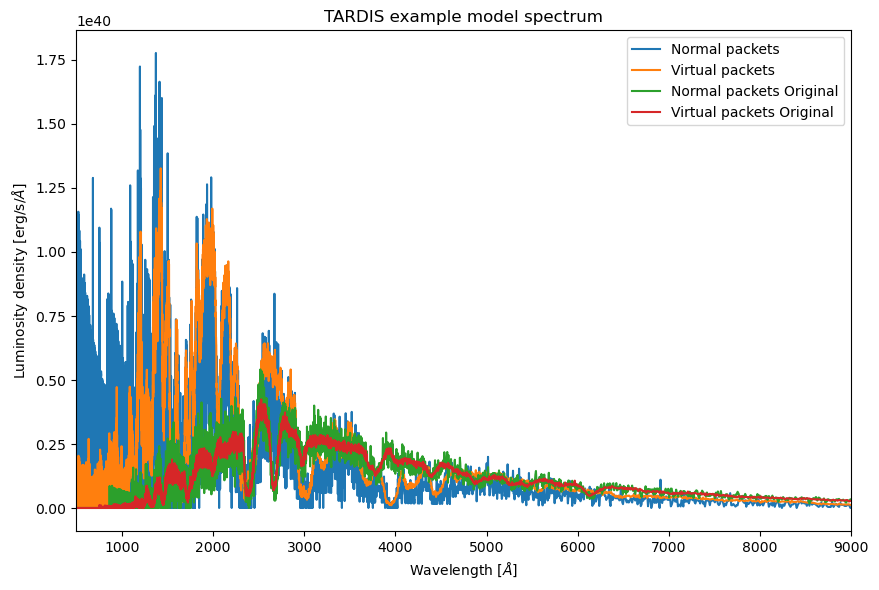

In [9]:
%matplotlib inline
plt.figure(figsize=(10, 6.5))

spectrum.plot(label="Normal packets")
spectrum_virtual.plot(label="Virtual packets")
#spectrum_integrated.plot(label='Formal integral')

spectrum2.plot(label="Normal packets Original")
spectrum_virtual2.plot(label="Virtual packets Original")
#spectrum_integrated2.plot(label='Formal integral Original')

plt.xlim(500, 9000)
plt.title("TARDIS example model spectrum")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Luminosity density [erg/s/$\AA$]")
plt.legend()
plt.show()

In [10]:
solver.simulation_state.v_inner

<Quantity [1.14468139e+09, 1.16800000e+09, 1.19400000e+09, 1.22000000e+09,
           1.24600000e+09, 1.27200000e+09, 1.29800000e+09, 1.32400000e+09,
           1.35000000e+09, 1.37600000e+09, 1.40200000e+09, 1.42800000e+09,
           1.45400000e+09, 1.48000000e+09, 1.50600000e+09, 1.53200000e+09,
           1.55800000e+09, 1.58400000e+09, 1.61000000e+09, 1.63600000e+09,
           1.66200000e+09, 1.68800000e+09, 1.71400000e+09, 1.74000000e+09,
           1.76600000e+09, 1.79200000e+09, 1.81800000e+09, 1.84400000e+09,
           1.87000000e+09, 1.89600000e+09, 1.92200000e+09, 1.94800000e+09,
           1.97400000e+09] cm / s>

In [11]:
solver2.simulation_state.v_inner

<Quantity [1.14468139e+09, 1.17060013e+09, 1.19651888e+09, 1.22243763e+09,
           1.24835637e+09, 1.27427512e+09, 1.30019386e+09, 1.32611261e+09,
           1.35203136e+09, 1.37795010e+09, 1.40386885e+09, 1.42978759e+09,
           1.45570634e+09, 1.48162508e+09, 1.50754383e+09, 1.53346258e+09,
           1.55938132e+09, 1.58530007e+09, 1.61121881e+09, 1.63713756e+09,
           1.66305630e+09, 1.68897505e+09, 1.71489380e+09, 1.74081254e+09,
           1.76673129e+09, 1.79265003e+09, 1.81856878e+09, 1.84448753e+09,
           1.87040627e+09, 1.89632502e+09, 1.92224376e+09, 1.94816251e+09,
           1.97408125e+09] cm / s>

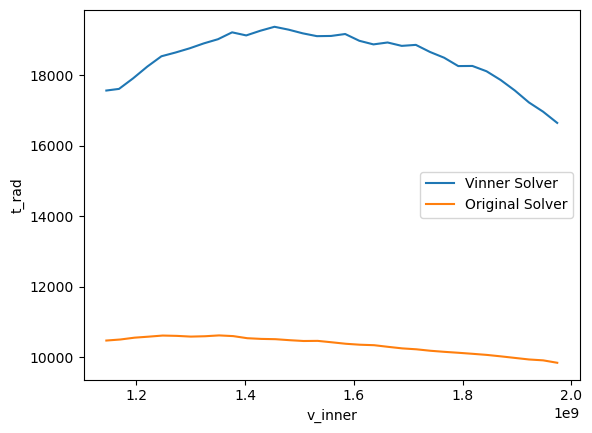

In [12]:
plt.plot(solver.simulation_state.v_inner, solver.simulation_state.t_radiative, label='Vinner Solver')
plt.plot(solver2.simulation_state.v_inner, solver2.simulation_state.t_radiative, label='Original Solver')

plt.xlabel('v_inner')
plt.ylabel('t_rad')
plt.legend()

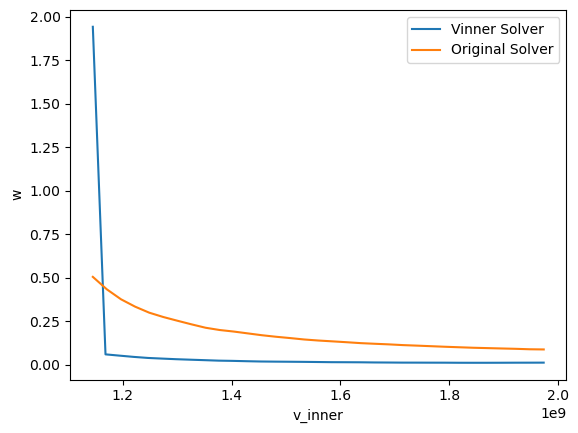

In [13]:
plt.plot(solver.simulation_state.v_inner, solver.simulation_state.dilution_factor, label='Vinner Solver')
plt.plot(solver2.simulation_state.v_inner, solver2.simulation_state.dilution_factor, label='Original Solver')

plt.xlabel('v_inner')
plt.ylabel('w')
plt.legend()

In [14]:
solver.simulation_state.t_inner, solver2.simulation_state.t_inner

(<Quantity 19291.23498345 K>, <Quantity 10295.48014273 K>)

In [15]:
solver.simulation_state.dilution_factor

array([1.94239935, 0.05875898, 0.05136843, 0.04417073, 0.03818986,
       0.03445732, 0.03090642, 0.02810828, 0.02541138, 0.02263287,
       0.02130752, 0.01935167, 0.01768975, 0.01691347, 0.01630788,
       0.01563404, 0.01476444, 0.01380566, 0.01352317, 0.01316676,
       0.0122491 , 0.01181819, 0.01126801, 0.01119741, 0.01099451,
       0.01090371, 0.0104599 , 0.01034285, 0.01038596, 0.01054608,
       0.01085491, 0.01095336, 0.01119173])

In [16]:
solver2.simulation_state.dilution_factor

array([0.50435496, 0.43234365, 0.37542029, 0.33311732, 0.29852256,
       0.27353635, 0.2521682 , 0.23142915, 0.21185539, 0.19878403,
       0.18992301, 0.17932157, 0.16876374, 0.15999318, 0.15243352,
       0.14431276, 0.13834611, 0.13355566, 0.12862279, 0.12336083,
       0.11967748, 0.11622623, 0.11201674, 0.1089825 , 0.10572898,
       0.10245978, 0.09959853, 0.09673395, 0.09469765, 0.09262185,
       0.09065876, 0.08806388, 0.08699879])

In [17]:
from tardis.workflows.util import get_tau_integ
import numpy as np

tau_integ =  get_tau_integ(
                solver.plasma_solver,
                solver.simulation_state,
            )['rossland']
        

In [18]:
tau_integ

array([1.31009887e+01, 1.14841084e+01, 9.67808468e+00, 8.07179982e+00,
       6.90173750e+00, 5.74516023e+00, 4.79654024e+00, 4.00507475e+00,
       3.31898784e+00, 2.73562443e+00, 2.25738497e+00, 1.85906291e+00,
       1.53634102e+00, 1.27636348e+00, 1.07224945e+00, 9.01462946e-01,
       7.69779795e-01, 6.67943119e-01, 5.84711880e-01, 5.13462658e-01,
       4.51437722e-01, 3.96933041e-01, 3.48952075e-01, 3.07069921e-01,
       2.70402359e-01, 2.38202257e-01, 2.09895302e-01, 1.84883025e-01,
       1.62970968e-01, 1.43568093e-01, 1.26364311e-01, 1.11181452e-01,
       9.77638774e-02, 8.58713177e-02, 7.52764976e-02, 6.58029641e-02,
       5.73905820e-02, 4.98832478e-02, 4.31333926e-02, 3.70872797e-02,
       3.16382450e-02, 2.67600922e-02, 2.23808925e-02, 1.84563311e-02,
       1.48999393e-02, 1.16931184e-02, 8.81112847e-03, 6.22719643e-03,
       3.91849298e-03, 1.84782638e-03])

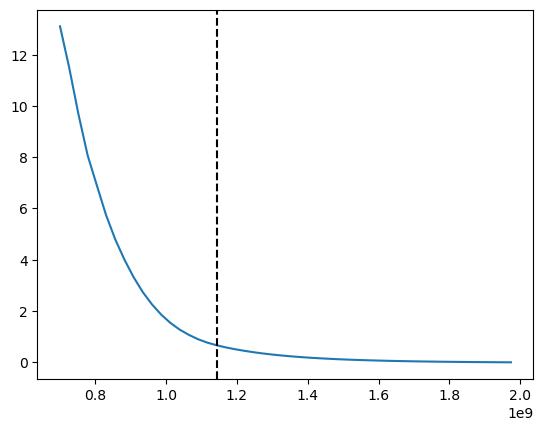

In [19]:
plt.plot(solver.simulation_state.geometry.v_inner, tau_integ)
plt.axvline(solver.simulation_state.v_inner_boundary.value, ls='--', color='k')

In [20]:
tau_integ2 = get_tau_integ(
                solver2.plasma_solver,
                solver2.simulation_state,
            )['rossland']

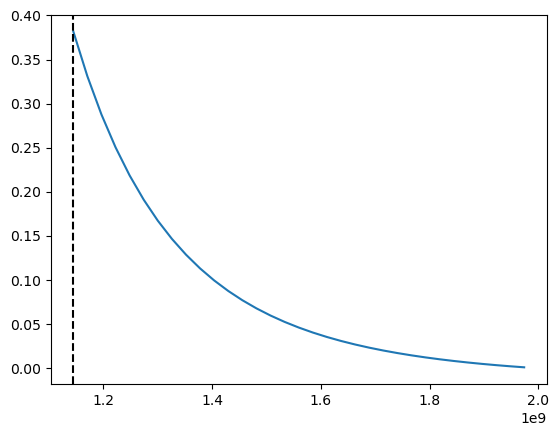

In [21]:
plt.plot(solver2.simulation_state.geometry.v_inner, tau_integ2)
plt.axvline(solver2.simulation_state.v_inner_boundary.value, ls='--', color='k')

In [22]:
solver.plasma_solver.electron_densities

0     7.043721e+10
1     7.822137e+10
2     7.160451e+10
3     5.094696e+10
4     5.447934e+10
5     4.598244e+10
6     3.864881e+10
7     3.363119e+10
8     2.855267e+10
9     2.336756e+10
10    1.942935e+10
11    1.573694e+10
12    1.269073e+10
13    9.924983e+09
14    8.119168e+09
15    6.199559e+09
16    4.692094e+09
17    3.820369e+09
18    3.290192e+09
19    2.889176e+09
20    2.562157e+09
21    2.274909e+09
22    1.997736e+09
23    1.759116e+09
24    1.553263e+09
25    1.371836e+09
26    1.217627e+09
27    1.069188e+09
28    9.497037e+08
29    8.441553e+08
30    7.463745e+08
31    6.607259e+08
32    5.865969e+08
33    5.234465e+08
34    4.687507e+08
35    4.168096e+08
36    3.724474e+08
37    3.352914e+08
38    3.006847e+08
39    2.712821e+08
40    2.431219e+08
41    2.184652e+08
42    1.959402e+08
43    1.777321e+08
44    1.603848e+08
45    1.442162e+08
46    1.293383e+08
47    1.155622e+08
48    1.036597e+08
49    9.248727e+07
dtype: float64

In [23]:
transport_state, virtual_packet_energies = solver.solve_montecarlo(
                solver.real_packet_count
            )

In [24]:
transport_state.radfield_mc_estimators.nu_bar_estimator.shape

(33,)

In [25]:
transport_state2, virtual_packet_energies2 = solver2.solve_montecarlo(
                solver.real_packet_count
            )
transport_state2.radfield_mc_estimators.nu_bar_estimator.shape

(33,)

In [26]:
transport_state.radfield_mc_estimators.j_estimator.shape, transport_state2.radfield_mc_estimators.j_estimator.shape

((33,), (33,))

In [27]:
solver.plasma_solver.electron_densities

0     7.043721e+10
1     7.822137e+10
2     7.160451e+10
3     5.094696e+10
4     5.447934e+10
5     4.598244e+10
6     3.864881e+10
7     3.363119e+10
8     2.855267e+10
9     2.336756e+10
10    1.942935e+10
11    1.573694e+10
12    1.269073e+10
13    9.924983e+09
14    8.119168e+09
15    6.199559e+09
16    4.692094e+09
17    3.820369e+09
18    3.290192e+09
19    2.889176e+09
20    2.562157e+09
21    2.274909e+09
22    1.997736e+09
23    1.759116e+09
24    1.553263e+09
25    1.371836e+09
26    1.217627e+09
27    1.069188e+09
28    9.497037e+08
29    8.441553e+08
30    7.463745e+08
31    6.607259e+08
32    5.865969e+08
33    5.234465e+08
34    4.687507e+08
35    4.168096e+08
36    3.724474e+08
37    3.352914e+08
38    3.006847e+08
39    2.712821e+08
40    2.431219e+08
41    2.184652e+08
42    1.959402e+08
43    1.777321e+08
44    1.603848e+08
45    1.442162e+08
46    1.293383e+08
47    1.155622e+08
48    1.036597e+08
49    9.248727e+07
dtype: float64

In [28]:
solver2.plasma_solver.electron_densities

0     2.343896e+09
1     2.009931e+09
2     1.729797e+09
3     1.492954e+09
4     1.292544e+09
5     1.121661e+09
6     9.759577e+08
7     8.518726e+08
8     7.456559e+08
9     6.538986e+08
10    5.744772e+08
11    5.061782e+08
12    4.470802e+08
13    3.956187e+08
14    3.508410e+08
15    3.118843e+08
16    2.776139e+08
17    2.475703e+08
18    2.212325e+08
19    1.980866e+08
20    1.775788e+08
21    1.594666e+08
22    1.434711e+08
23    1.292518e+08
24    1.166377e+08
25    1.054165e+08
26    9.540792e+07
27    8.646782e+07
28    7.845943e+07
29    7.128311e+07
30    6.484653e+07
31    5.908212e+07
32    5.385907e+07
dtype: float64

ValueError: x and y must have same first dimension, but have shapes (33,) and (50,)

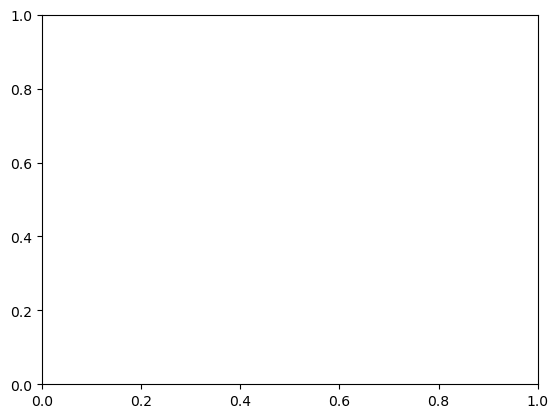

In [29]:
plt.plot(solver.simulation_state.v_inner, 
         solver.plasma_solver.electron_densities, 
         label='V_inner Solver')
plt.plot(solver2.simulation_state.v_inner, 
         solver2.plasma_solver.electron_densities, 
         label='Original Solver')
plt.ylabel('electron_densities')

In [ ]:
plt.plot(solver.simulation_state.geometry.v_inner, 
         solver.simulation_state.composition.elemental_number_density.loc[8], 
         label='V_inner Solver')
plt.plot(solver2.simulation_state.geometry.v_inner, 
         solver2.simulation_state.composition.elemental_number_density.loc[8], 
         label='Original Solver')

In [ ]:
solver2.simulation_state.composition.elemental_number_density

In [ ]:
solver.plasma_solver.outputs_dict.keys()

In [ ]:
solver.plasma_solver.outputs_dict['abundance'].name

In [ ]:
solver.simulation_state.abundance